In [137]:
'''
target이 price와 같이 연속형일 때는
DecisionTreeClassifier 말고
DecisionTreeRegressor 이용.
'''

'\ntarget이 price와 같이 연속형일 때는\nDecisionTreeClassifier 말고\nDecisionTreeRegressor 이용.\n'

In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

In [139]:
df = pd.read_csv("boston.csv")
df.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [140]:
df.drop("Unnamed: 0", axis=1, inplace=True)

In [141]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [142]:
np.unique(df['medv'])

array([ 5. ,  5.6,  6.3,  7. ,  7.2,  7.4,  7.5,  8.1,  8.3,  8.4,  8.5,
        8.7,  8.8,  9.5,  9.6,  9.7, 10.2, 10.4, 10.5, 10.8, 10.9, 11. ,
       11.3, 11.5, 11.7, 11.8, 11.9, 12. , 12.1, 12.3, 12.5, 12.6, 12.7,
       12.8, 13. , 13.1, 13.2, 13.3, 13.4, 13.5, 13.6, 13.8, 13.9, 14. ,
       14.1, 14.2, 14.3, 14.4, 14.5, 14.6, 14.8, 14.9, 15. , 15.1, 15.2,
       15.3, 15.4, 15.6, 15.7, 16. , 16.1, 16.2, 16.3, 16.4, 16.5, 16.6,
       16.7, 16.8, 17. , 17.1, 17.2, 17.3, 17.4, 17.5, 17.6, 17.7, 17.8,
       17.9, 18. , 18.1, 18.2, 18.3, 18.4, 18.5, 18.6, 18.7, 18.8, 18.9,
       19. , 19.1, 19.2, 19.3, 19.4, 19.5, 19.6, 19.7, 19.8, 19.9, 20. ,
       20.1, 20.2, 20.3, 20.4, 20.5, 20.6, 20.7, 20.8, 20.9, 21. , 21.1,
       21.2, 21.4, 21.5, 21.6, 21.7, 21.8, 21.9, 22. , 22.1, 22.2, 22.3,
       22.4, 22.5, 22.6, 22.7, 22.8, 22.9, 23. , 23.1, 23.2, 23.3, 23.4,
       23.5, 23.6, 23.7, 23.8, 23.9, 24. , 24.1, 24.2, 24.3, 24.4, 24.5,
       24.6, 24.7, 24.8, 25. , 25.1, 25.2, 25.3, 26

In [143]:
input=df.iloc[:, :-1]
output=df['medv']

In [144]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_output, test_output=train_test_split(input,output)

In [145]:
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeRegressor

In [146]:
DTR=DecisionTreeRegressor()

In [147]:
DTR.fit(train_input,train_output)

DecisionTreeRegressor()

In [148]:
DTR.score(test_input,test_output)

0.7580397932002483

In [149]:
np.corrcoef(DTR.predict(test_input),test_output) #correlation coefficient

array([[1.        , 0.87491029],
       [0.87491029, 1.        ]])

In [150]:
from sklearn.metrics import mean_squared_error
MSE=mean_squared_error(DTR.predict(test_input), test_output)
MSE

19.18055118110236

In [151]:
NMSE=MSE/np.max(test_output) # np.mean(test_output) , np.max(test_output)-np.min(test_output)
NMSE

0.3836110236220472

[Text(0.5, 0.875, 'rm <= 6.825\nsquared_error = 86.124\nsamples = 379\nvalue = 22.605'),
 Text(0.25, 0.625, 'lstat <= 15.0\nsquared_error = 37.726\nsamples = 310\nvalue = 19.562'),
 Text(0.125, 0.375, 'dis <= 1.385\nsquared_error = 24.709\nsamples = 188\nvalue = 22.759'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'crim <= 6.341\nsquared_error = 17.784\nsamples = 122\nvalue = 14.637'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'rm <= 7.437\nsquared_error = 75.088\nsamples = 69\nvalue = 36.275'),
 Text(0.625, 0.375, 'crim <= 17.024\nsquared_error = 34.343\nsamples = 46\nvalue = 31.9'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'ptratio <= 18.3\nsquared_error = 41.716\nsamples = 23\nvalue = 45.026'),
 Text(0.8125, 0.125, '\n  (...)  \n'),
 Text(0.9375, 0.125, '\n  (...)  \n')]

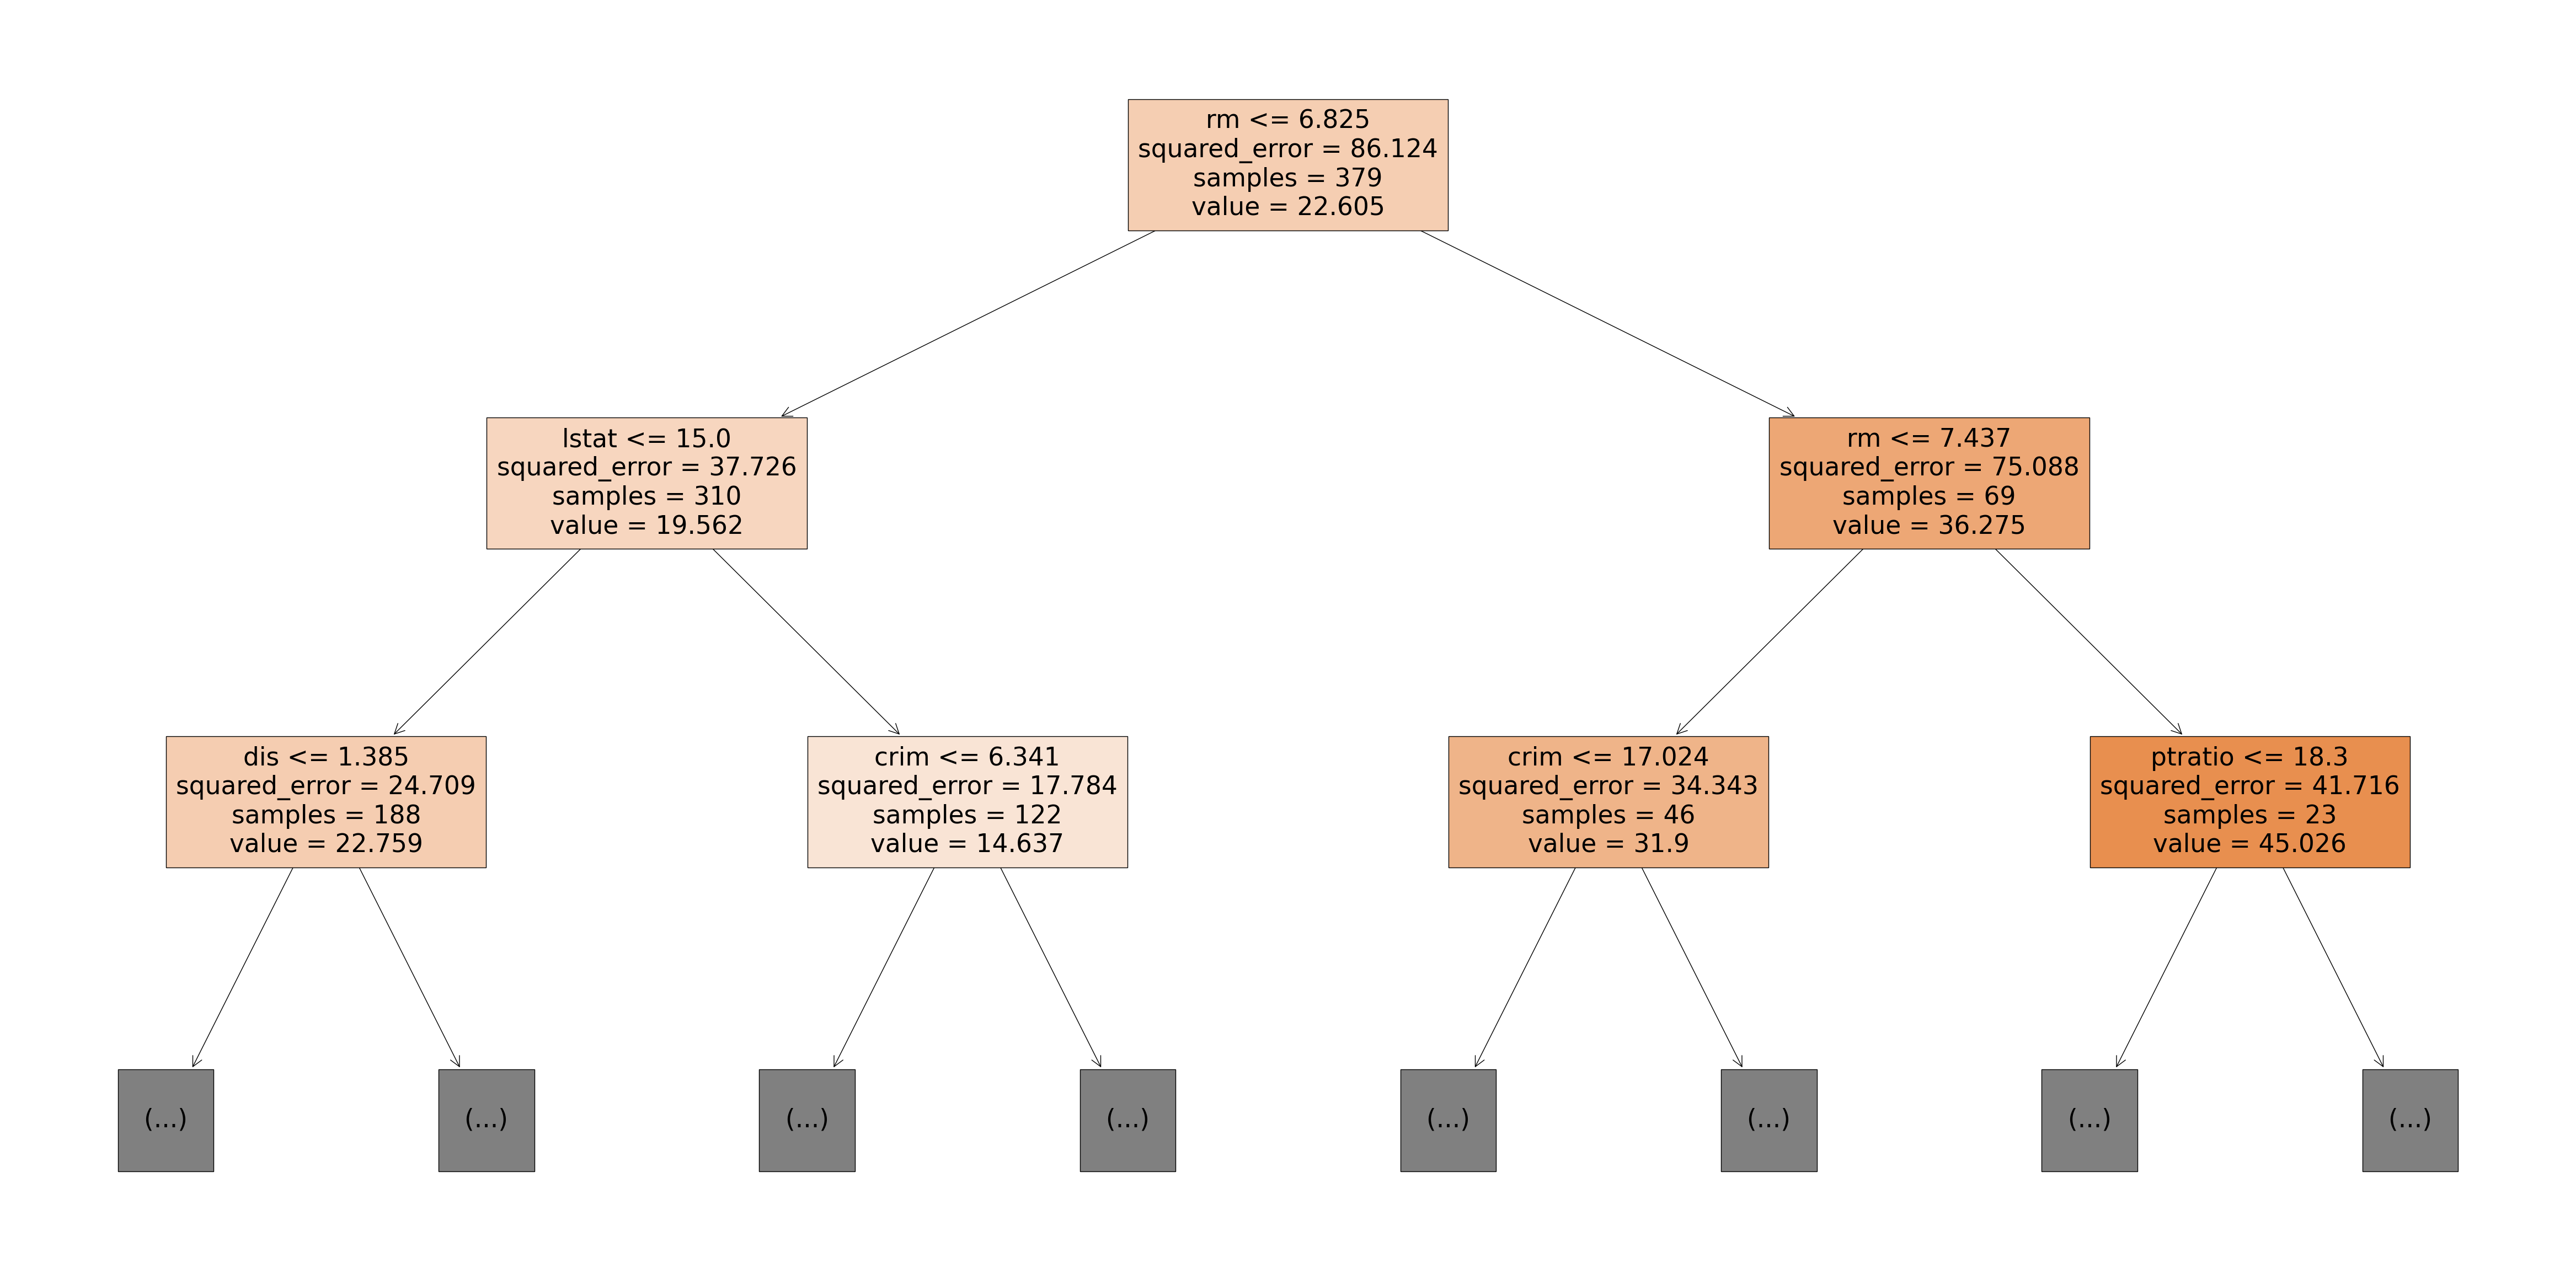

In [179]:
plt.figure(figsize=(60,30))
plot_tree(DTR,max_depth=2, filled=True, feature_names=df.columns)

In [153]:
DTR.feature_importances_

array([6.89443744e-02, 2.93831986e-04, 3.93350911e-03, 6.32575436e-04,
       1.11327781e-02, 6.11005559e-01, 6.95044388e-03, 7.89791578e-02,
       4.77797931e-04, 7.77329791e-03, 2.55271341e-02, 1.45172531e-02,
       1.69832287e-01])

In [185]:
idx = np.argmax(DTR.feature_importances_)

In [199]:
print(f'가장 중요한 변수는 {df.columns[idx]}이다.')

가장 중요한 변수는 rm이다.
